In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import load_model
from keras.models import Model
from keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

In [2]:
#Cargar imágenes de cada clase en una variable
train_class1='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_01'
train_class2='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_02'
train_class3='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_03'
train_class4='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_04'
train_class5='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_05'
train_class6='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_06'
train_class7='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_07'
train_class8='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/train/CLASS_08'


In [3]:
#Carga de imagenes Clase 1
train_img1=[]
img_size=100
for img in os.listdir(train_class1):
    img = cv2.imread(os.path.join(train_class1,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img1.append(img_resize)

In [4]:
train_img1 = np.array(train_img1)
print(train_img1.shape)


(0,)


In [5]:
#Carga de imagenes Clase 2
train_img2=[]
img_size=100
for img in os.listdir(train_class2):
    img = cv2.imread(os.path.join(train_class2,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img2.append(img_resize)

In [6]:
train_img2 = np.array(train_img2)
print(train_img2.shape)

(62, 100, 100, 3)


(100, 100, 3)


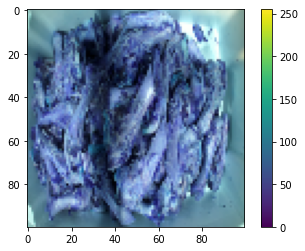

In [7]:
print(train_img2[3].shape)
plt.figure()
plt.imshow(np.squeeze(train_img2[3]))
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#Carga de imagenes de train Clase 03
train_img3=[]
img_size=100
for img in os.listdir(train_class3):
    img = cv2.imread(os.path.join(train_class3,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img3.append(img_resize)
train_img3= np.array(train_img3)

#Carga de imagenes de train Clase 04
train_img4=[]
img_size=100
for img in os.listdir(train_class4):
    img = cv2.imread(os.path.join(train_class4,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img4.append(img_resize)
train_img4= np.array(train_img4)

#Carga de imagenes de train Clase 05
train_img5=[]
img_size=100
for img in os.listdir(train_class5):
    img = cv2.imread(os.path.join(train_class5,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img5.append(img_resize)
train_img5= np.array(train_img5)


#Carga de imagenes de train Clase 06
train_img6=[]
img_size=100
for img in os.listdir(train_class6):
    img = cv2.imread(os.path.join(train_class6,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img6.append(img_resize)
train_img6= np.array(train_img6)

#Carga de imagenes de train Clase 07
train_img7=[]
img_size=100
for img in os.listdir(train_class7):
    img = cv2.imread(os.path.join(train_class7,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img7.append(img_resize)
train_img7= np.array(train_img7)

#Carga de imagenes de train Clase 08
train_img8=[]
img_size=100
for img in os.listdir(train_class8):
    img = cv2.imread(os.path.join(train_class8,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    train_img8.append(img_resize)
train_img8= np.array(train_img8)

In [9]:
#Unir las diferentes clases de train
train_imagenes=np.concatenate([train_img2, train_img3,train_img4, train_img5, train_img6, train_img7, train_img8])
print(len(train_imagenes))

1633


In [10]:
#Cargar imágenes de cada test en una variable
test_class1='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_01'
test_class2='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_02'
test_class3='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_03'
test_class4='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_04'
test_class5='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_05'
test_class6='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_06'
test_class7='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_07'
test_class8='/Users/JuanVillalba/Desktop/ImageProcess/CarneDataset/test/CLASS_08'

In [11]:
#Carga de imagenes test clase 01
test_img1=[]
img_size=100
for img in os.listdir(test_class1):
    img = cv2.imread(os.path.join(test_class1,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img1.append(img_resize)
    test_img1 = np.array(test_img1)
    
#Carga de imagenes de test Clase 02
test_img2=[]
img_size=100
for img in os.listdir(test_class2):
    img = cv2.imread(os.path.join(test_class2,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img2.append(img_resize)

#Carga de imagenes de test Clase 03
test_img3=[]
img_size=100
for img in os.listdir(test_class3):
    img = cv2.imread(os.path.join(test_class3,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img3.append(img_resize)
test_img3= np.array(test_img3)

#Carga de imagenes de test Clase 04
test_img4=[]
img_size=100
for img in os.listdir(test_class4):
    img = cv2.imread(os.path.join(test_class4,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img4.append(img_resize)
test_img4= np.array(test_img4)

#Carga de imagenes de test Clase 05
test_img5=[]
img_size=100
for img in os.listdir(test_class5):
    img = cv2.imread(os.path.join(test_class5,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img5.append(img_resize)
test_img5= np.array(test_img5)


#Carga de imagenes de test Clase 06
test_img6=[]
img_size=100
for img in os.listdir(test_class6):
    img = cv2.imread(os.path.join(test_class6,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img6.append(img_resize)
test_img6= np.array(test_img6)

#Carga de imagenes de test Clase 07
test_img7=[]
img_size=100
for img in os.listdir(test_class7):
    img = cv2.imread(os.path.join(test_class7,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img7.append(img_resize)
test_img7= np.array(test_img7)

#Carga de imagenes de test Clase 08
test_img8=[]
img_size=100
for img in os.listdir(test_class8):
    img = cv2.imread(os.path.join(test_class8,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    test_img8.append(img_resize)
test_img8= np.array(test_img8)


In [12]:
#Unir las diferentes arreglos de clases de test
test_imagenes=np.concatenate([test_img1, test_img2, test_img3,test_img4, test_img5, test_img6, test_img7, test_img8])
print(len(test_imagenes))


810


In [13]:
#Etiquetas Generadas
label_class1=np.repeat(0,0) #se etiqueta con 2 y son 62 imagenes de categoria 2
label_class2=np.repeat(1,62) #se etiqueta con 2 y son 62 imagenes de categoria 2
label_class3=np.repeat(2,213) #se etiqueta con 3 y son 213 imagenes de categoria 3
label_class4=np.repeat(3,105) #se etiqueta con 4 y son 105 imagenes de categoria 4
label_class5=np.repeat(4,949) #se etiqueta con 5 y son 949 imagenes de categoria 5
label_class6=np.repeat(5,37) #se etiqueta con 6 y son 37 imagenes de categoria 6
label_class7=np.repeat(6,204) #se etiqueta con 7 y son 204 imagenes de categoria 7
label_class8=np.repeat(7,63) #se etiqueta con 8 y son 63 imagenes de categoria 8

label_clases=['Class_01','Class_02','Class_03','Class_04','Class_05','Class_06','Class_07','Class_08']

labels=np.concatenate([label_class1,label_class2,label_class3,label_class4,label_class5,label_class6,label_class7,label_class8])
print(len(labels)) #Cantidad de etiquetas a imagenes

trainlabels=np.array(labels)
print(trainlabels) #No existen de la clase 1 en el train


1633
[1 1 1 ... 7 7 7]


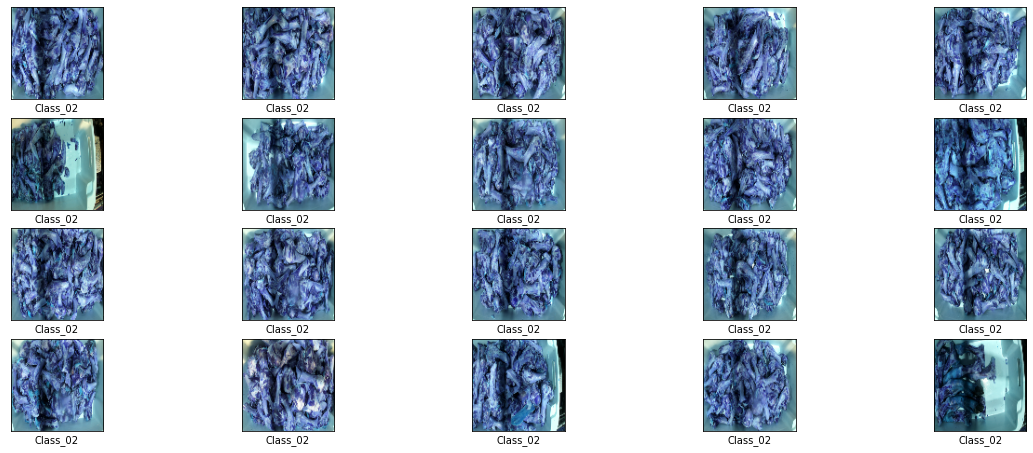

In [14]:
plt.figure(figsize=(20,20))
i=0
for i in range(20):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagenes[i])
    plt.xlabel(label_clases[trainlabels[i]])
plt.show()


In [27]:
neuralmodel = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
neuralmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = neuralmodel.fit(train_imagenes, trainlabels, epochs=10)


Epoch 1/10
52/52 [==============================] - 1s 10ms/step - loss: 2417.2576 - accuracy: 0.5021
Epoch 2/10
52/52 [==============================] - 0s 7ms/step - loss: 174.6413 - accuracy: 0.6277
Epoch 3/10
52/52 [==============================] - 0s 7ms/step - loss: 141.0343 - accuracy: 0.6412
Epoch 4/10
52/52 [==============================] - 0s 8ms/step - loss: 52.8887 - accuracy: 0.7348
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 107.7734 - accuracy: 0.7067
Epoch 6/10
52/52 [==============================] - 0s 8ms/step - loss: 73.3884 - accuracy: 0.7446
Epoch 7/10
52/52 [==============================] - 0s 8ms/step - loss: 34.8947 - accuracy: 0.7973
Epoch 8/10
52/52 [==============================] - 0s 7ms/step - loss: 230.0602 - accuracy: 0.6307
Epoch 9/10
52/52 [==============================] - 0s 8ms/step - loss: 24.5999 - accuracy: 0.8010
Epoch 10/10
52/52 [==============================] - 0s 8ms/step - loss: 35.6548 - accuracy: 0.7771


In [28]:
print(neuralmodel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3840128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,841,418
Trainable params: 3,841,418
Non-trainable params: 0
_________________________________________________________________
None


(100, 100, 3)
(1, 100, 100, 3)


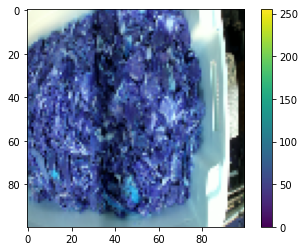

In [29]:
#Tomar una imagen de las de Test para validar su identificación
img=test_imagenes[180]
print(img.shape)
img=(np.expand_dims(img,0))
print(img.shape)

plt.figure()
plt.imshow(test_imagenes[180])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
prediccion=neuralmodel.predict(img)
print(prediccion)
print(np.argmax(prediccion))
print(label_clases[np.argmax(prediccion)])


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
Class_02


In [33]:
#Matriz de confusion
y_prediction = np.argmax (prediccion, axis = 1)
y_test=np.argmax(test_imagenes, axis=1)
result = confusion_matrix(y_test, prediccion , normalize='pred')
print(result)




ValueError: Found input variables with inconsistent numbers of samples: [810, 1]